In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# reflect the tables

base = automap_base()

base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB

session = Session(engine)

Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set
# Find column names

inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


precip = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= "2016-03-23").\
filter(measurement.date <= "2017-08-23").order_by(measurement.date.desc()).all()
precip[:5]

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(data=precip, columns=['Date', 'Precipitation'])
precip_df

Date  Precipitation
0     2017-08-23           0.00
1     2017-08-23           0.00
2     2017-08-23           0.08
3     2017-08-23           0.45
4     2017-08-22           0.00
...          ...            ...
3192  2016-03-23           0.72
3193  2016-03-23            NaN
3194  2016-03-23           1.05
3195  2016-03-23           0.31
3196  2016-03-23           0.00

[3197 rows x 2 columns]

In [32]:
# Sort the dataframe by date

precip_date = precip_df.sort_values('Date')

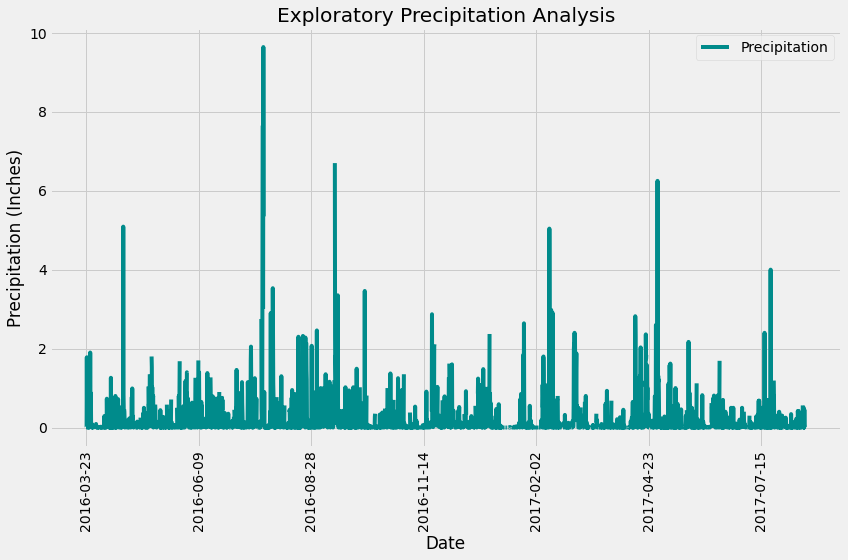

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_date.plot(figsize=(12,8), color='darkcyan')
plt.title("Exploratory Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.xticks(rotation=90)
plt.tight_layout()

In [63]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
    
precip_date.describe()

Precipitation
count    2883.000000
mean        0.193059
std         0.518190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.150000
max         9.640000

Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset

columns = inspector.get_columns('station')
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [72]:
stations_total = session.query(station).filter(station.id).count()
stations_total

9

In [91]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

